In [1]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

## Data preprocessing

In [2]:
u_data = open('../dataset/ml-100k/u.data','r')
base = u_data.read()

In [3]:
data_set = base

lines = data_set.strip().split("\n")  # Split by newline characters
user_rating = []

for line in lines:
    elements = (line.split("\t"))  # Split by tabs
    elements_int = [str(x) for x in elements]
    if len(elements_int) == 4:  # Check if there are 4 elements
        user_rating.append(elements_int)

In [4]:
users = {}
users_no_attributes = []
user_list = []
movies = {}
movies_no_attributes = []


edges = []
for entry in user_rating:
    if int(entry[2]) < 4:
        continue
    if "user_" + entry[0] not in users:
        users["user_" + entry[0]] = {"type": "users"}
        users_no_attributes.append("user_" + entry[0])
        user_list.append(int(entry[0]))
    if "movie_" + entry[1] not in movies:
        movies["movie_" + entry[1]] = {"type": "movies"}
        movies_no_attributes.append("movie_" + entry[1])
    edges.append(("user_" + entry[0], "movie_" + entry[1]))

user_map = sorted(user_list)

## Create the graph

In [5]:
def user_graph(index):
    user_id = 'user_'+str(index)
    print(user_id)
    G_user2 = nx.Graph()
    for user in users:
        if (user[0]==user_id):
            G_user2.add_node(user_id)
            break
    for edge in edges:
        if (edge[0]==user_id):
            #print(edge)
            G_user2.add_node(edge[1])
            G_user2.add_edges_from([edge])

    print(len(G_user2.nodes()))
    nx.draw(G_user2, with_labels=True)


user_5
59


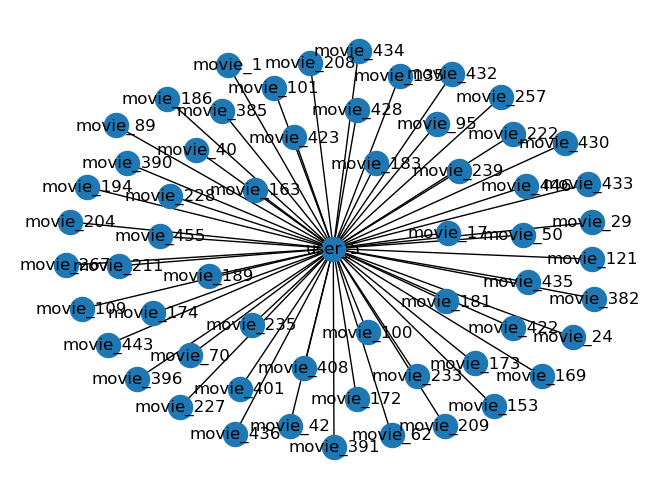

In [6]:
user_graph(5)

In [7]:
G = nx.Graph()
G.add_nodes_from(users)
G.add_nodes_from(movies)
G.add_edges_from(edges)


Graph with 2389 nodes and 55375 edges


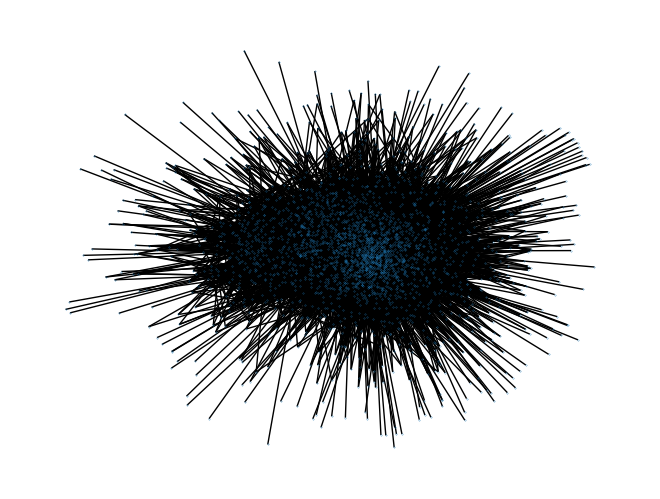

In [8]:
print(G)
nx.draw(G, node_size=0.05)

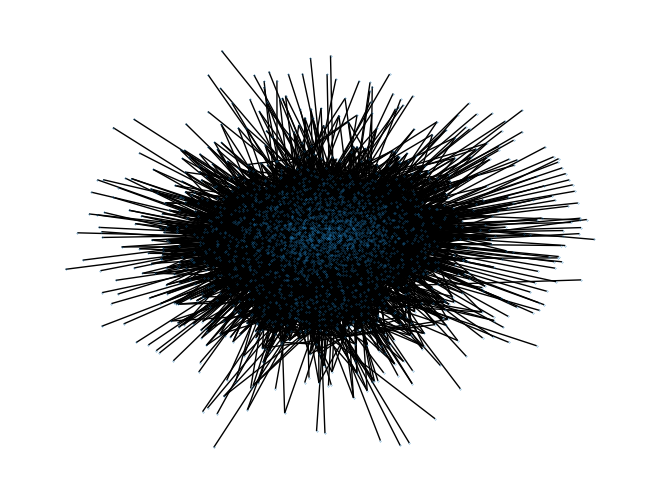

In [9]:
B = nx.Graph()
B.add_nodes_from(users, bipartite=1)
B.add_nodes_from(movies, bipartite=0)
B.add_edges_from(edges)
nx.draw(B, 
        #with_labels = True, 
        node_size = 0.05)  

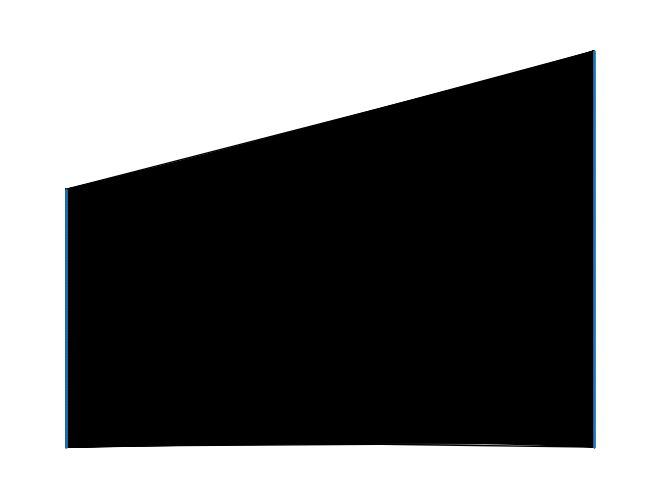

In [10]:
X, Y = nx.bipartite.sets(B)
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2
nx.draw(B, pos=pos, node_size=0.1)

## Statistics

In [11]:
nx.diameter(G)

6

In [12]:
nx.average_shortest_path_length(G)

2.905270737670493

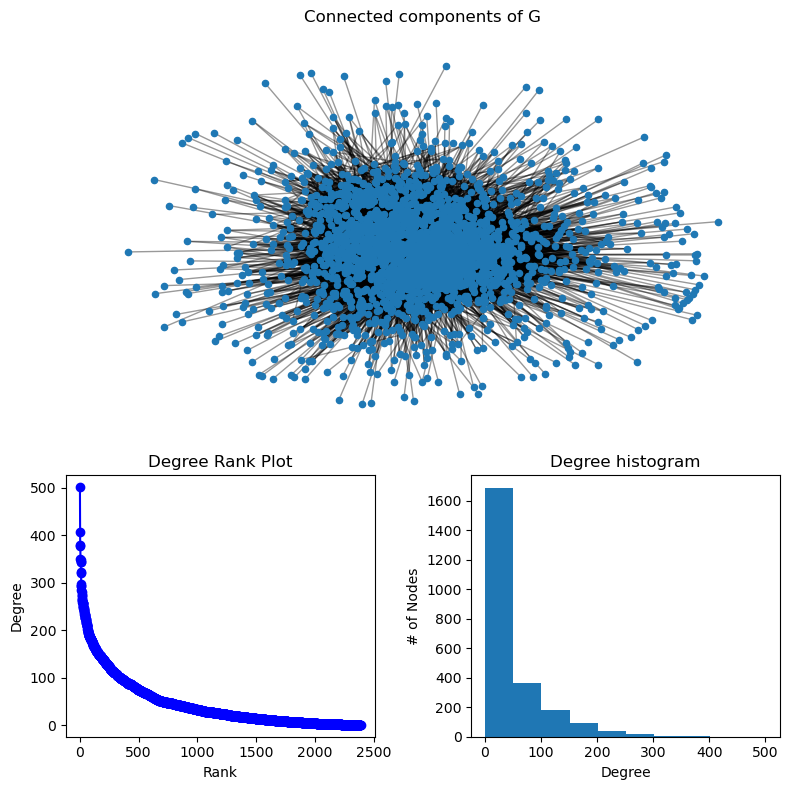

In [13]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.hist(degree_sequence)
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

## Gender - Genre

In [14]:
genres= [
    "unknown|0",
    "Action|1",
    "Adventure|2",
    "Animation|3",
    "Children's|4",
    "Comedy|5",
    "Crime|6",
    "Documentary|7",
    "Drama|8",
    "Fantasy|9",
    "Film-Noir|10",
    "Horror|11",
    "Musical|12",
    "Mystery|13",
    "Romance|14",
    "Sci-Fi|15",
    "Thriller|16",
    "War|17",
    "Western|18"
]
gender_names = ['Male', 'Female']

In [15]:
# Retrieve the data
u_data = open('../dataset/ml-100k/u.genre','r')
genre_names = u_data.read()
df_u_item = pd.read_csv('../dataset/ml-100k/u.item', sep='|', 
                #names=genres , 
                encoding='latin-1')
u_user = open('../dataset/ml-100k/u.user','r')
user_info_stream = u_user.read()

In [16]:
# Prepocess: get lines of user_info
user_info = {} 

lines = user_info_stream.strip().split("\n")  # Split by newline characters
for user_id in lines:
    elems = user_id.strip().split("|")
    user_info[elems[0]] = elems

# drop the unncecessary columns and convert it to dict
df_u_item.drop(df_u_item.columns[[1,2,3,4]], axis=1, inplace=True)
u_item = {el[0]: el for el in np.array(df_u_item)}

In [17]:
for movie in np.array(df_u_item):
    print(movie)
    break

np.array(df_u_item)

[2 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]


array([[   2,    0,    1, ...,    1,    0,    0],
       [   3,    0,    0, ...,    1,    0,    0],
       [   4,    0,    1, ...,    0,    0,    0],
       ...,
       [1680,    0,    0, ...,    0,    0,    0],
       [1681,    0,    0, ...,    0,    0,    0],
       [1682,    0,    0, ...,    0,    0,    0]])

In [18]:
# We have 18 genres and 2 genders


user_by_genre_male = {user: np.array([0 for i in range(0,19)]) for user in users}
user_by_genre_female = {user: np.array([0 for i in range(0,19)]) for user in users}
males = 0
females = 0
occurence_male = [0 for i in range(0,19)]
occurence_female =[0 for i in range(0,19)]

# check all ratings
warned_misses = set()
for rating in user_rating:
    if int(rating[2]) < 4:
        continue
    #print(rating)
    if not int(rating[1]) in u_item:
        if rating[1] not in warned_misses:
            print(f"Warning: movie {rating[1]} not found.")
            warned_misses.add(rating[1])
        continue
    movie = u_item[int(rating[1])]
    if not rating[0] in user_info:
        print(f"Warning: user {rating[0]} not found.")
        continue
    user = user_info[rating[0]]
    # Add the genre information to the users genre list
    #print(user[0])
    #print(user_by_genre[int(user[0])])
    #print(movie[1:])
    # print(user_by_genre[int(user[0])])
    # check if the user is male or female and increase the list by 1 for every genre the movie belongs to
    if user[2]=='M':
        user_by_genre_male["user_"+user[0]] += movie[1:]
        males += 1
        occurence_male += movie[1:]
    elif user[2]=='F':
        user_by_genre_female["user_"+user[0]] += movie[1:]
        females += 1
        occurence_female+= movie[1:]
            
#iterate over users and 
print(occurence_male)
print(occurence_female)
print(males, females)

[    4 10627  5635  1201  2054 10591  3775   364 17973   408   975  1926
  1826  2407  7911  5768  9185  4837   853]
[   1 2907 1704  506 1054 4034 1023  113 6632  151  249  561  851  751
 3530 1423 2740 1412  211]
40856 14198


In [19]:
for user_id in user_by_genre_male.keys():
    #print(i, user)
    # sort the entries
    #user_by_genre_male["user_"+i] = sorted(user_by_genre_male["user_"+i], reverse=True)
    # normalize them and take only the 10% largest
    #print(user_by_genre_male["user_"+i])
    if sum(user_by_genre_male[user_id])!=0:
        user_by_genre_male[user_id] = user_by_genre_male[user_id] / sum(user_by_genre_male[user_id])
    #print(user_by_genre_male["user_"+i])
    for k, pref in enumerate(user_by_genre_male[user_id]):
        #print(k, pref)
        if pref >= 0.1:
            user_by_genre_male[user_id][k] = 1
        else:
            user_by_genre_male[user_id][k] = 0
    #print(user_by_genre_male["user_"+i])

In [20]:
user_by_genre_male

{'user_298': array([0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]),
 'user_253': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'user_286': array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0.]),
 'user_200': array([0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]),
 'user_122': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'user_291': array([0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0.]),
 'user_119': array([0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
        0., 0.]),
 'user_167': array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0.]),
 'user_299': array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0.]),
 'user_308': array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [21]:
for user_id in user_by_genre_female.keys():
    # sort the entries
    #print(user_by_genre_female["user_"+i])
    #user_by_genre_female["user_"+i] = sorted(user_by_genre_female["user_"+i], reverse=True)
    # normalize them and take only the 10% largest
    if sum(user_by_genre_female[user_id])!=0:
        user_by_genre_female[user_id] = user_by_genre_female[user_id] / sum(user_by_genre_female[user_id])
    #print(user_by_genre_female["user_"+i])
    for k, pref in enumerate(user_by_genre_female[user_id]):
        if pref >= 0.1:
            user_by_genre_female[user_id][k] = 1
        else:
            user_by_genre_female[user_id][k] = 0
    #print(user_by_genre_female["user_"+i])

In [22]:
total_user_by_genre_male = [0 for i in range(0,19)]
total_user_by_genre_female = [0 for i in range(0,19)]

for male_pref in user_by_genre_male.values():
    #total_user_by_genre_male += zip(male_pref)
    total_user_by_genre_male = [sum(i) for i in zip(total_user_by_genre_male, list(male_pref))]
print(total_user_by_genre_male)

for female_pref in user_by_genre_female.values():
    #total_user_by_genre_female += female_pref
    total_user_by_genre_female = [sum(i) for i in zip(total_user_by_genre_female, list(female_pref))]
print(total_user_by_genre_female)

[0.0, 401.0, 89.0, 1.0, 5.0, 402.0, 39.0, 0.0, 617.0, 0.0, 0.0, 19.0, 0.0, 25.0, 255.0, 109.0, 360.0, 41.0, 0.0]
[0.0, 131.0, 25.0, 2.0, 6.0, 172.0, 14.0, 1.0, 255.0, 1.0, 0.0, 8.0, 4.0, 9.0, 180.0, 16.0, 123.0, 19.0, 0.0]


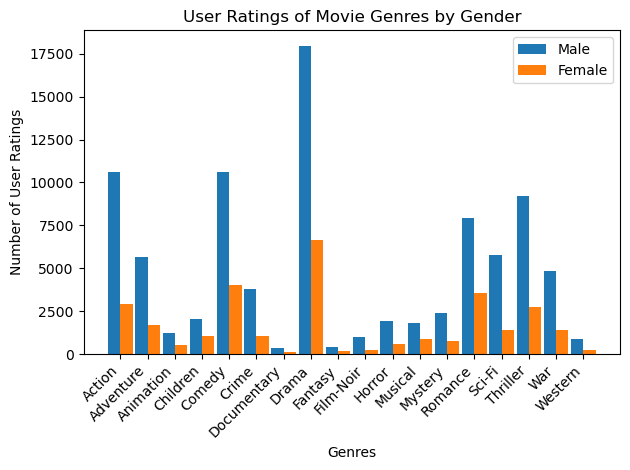

In [23]:
# Generate basic bar plot
genres = np.arange(len(occurence_male[1:])) 

# Creating the bar plot
width = 0.45  # the width of the bars
fig, ax = plt.subplots()
bars1 = ax.bar(genres - width/2, occurence_male[1:], width, label='Male')
bars2 = ax.bar(genres + width/2, occurence_female[1:], width, label='Female')

# Adding labels and title
ax.set_xlabel('Genres')
ax.set_ylabel('Number of User Ratings')
ax.set_title('User Ratings of Movie Genres by Gender')
ax.set_xticks(genres)
ax.set_xticklabels(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
ax.legend()

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

[14, 17, 9, 5, 0, 10, 16, 15, 1, 6, 12, 7, 8, 4, 2, 13, 11, 3]


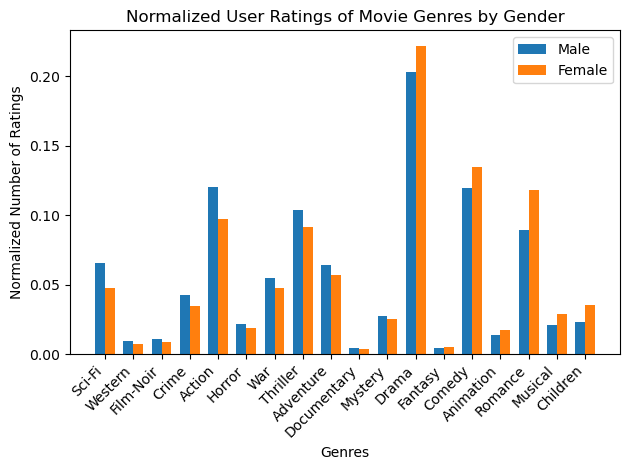

In [24]:
# Generate normalized bar plot
genres = np.arange(len(occurence_male[1:]))

# Normalize occurrences
total_male = np.sum(occurence_male[1:])
total_female = np.sum(occurence_female[1:])
normalized_male = occurence_male[1:] / total_male
normalized_female = occurence_female[1:] / total_female

# sort genres by bias
genres_names = [
    "Action",
    "Adventure",
    "Animation",
    "Children",
    "Comedy",
    "Crime",
    "Documentary",
    "Drama",
    "Fantasy",
    "Film-Noir",
    "Horror",
    "Musical",
    "Mystery",
    "Romance",
    "Sci-Fi",
    "Thriller",
    "War",
    "Western",
]
bias = normalized_female / normalized_male
sorted_indexes = sorted(range(len(genres_names)), key=lambda i: bias[i])
genres_names = [genres_names[i] for i in sorted_indexes]
print(sorted_indexes)

# Creating the bar plot
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
bars1 = ax.bar(genres - width / 2, normalized_male[sorted_indexes], width, label="Male")
bars2 = ax.bar(genres + width / 2, normalized_female[sorted_indexes], width, label="Female")

# Adding labels and title
ax.set_xlabel("Genres")
ax.set_ylabel("Normalized Number of Ratings")
ax.set_title("Normalized User Ratings of Movie Genres by Gender")
ax.set_xticks(genres)
ax.set_xticklabels(genres_names)
ax.legend()

# Display the plot
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

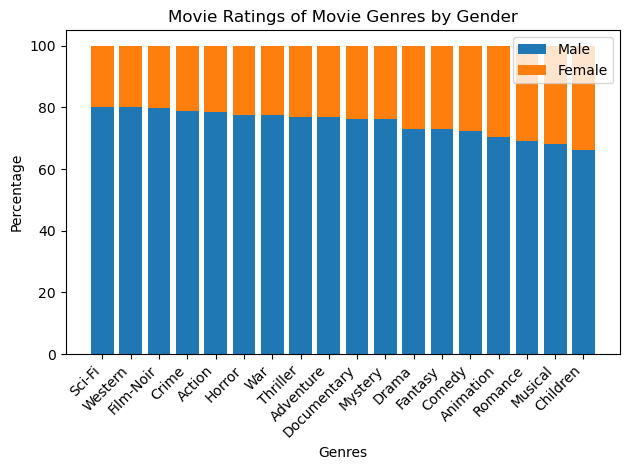

In [25]:
# Percentage wise bar plot
genres = np.arange(len(occurence_male[1:]))

# Stack male and female occurrences
stacked_occurrences = np.vstack((occurence_male[1:], occurence_female[1:]))

# Calculate total occurrences
total_occurrences = np.sum(stacked_occurrences, axis=0)

# Calculate percentages
percentage_occurrences = stacked_occurrences / total_occurrences * 100

percentage_occurrences = percentage_occurrences[:,sorted_indexes]

# Plotting
fig, ax = plt.subplots()
bars1 = ax.bar(genres, percentage_occurrences[0], label='Male')
bars2 = ax.bar(genres, percentage_occurrences[1], bottom=percentage_occurrences[0], label='Female')

# Adding labels and title
ax.set_xlabel('Genres')
ax.set_ylabel('Percentage')
ax.set_title('Movie Ratings of Movie Genres by Gender')
ax.set_xticks(genres)
ax.set_xticklabels(genres_names)
ax.legend()

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Preferrences of Users

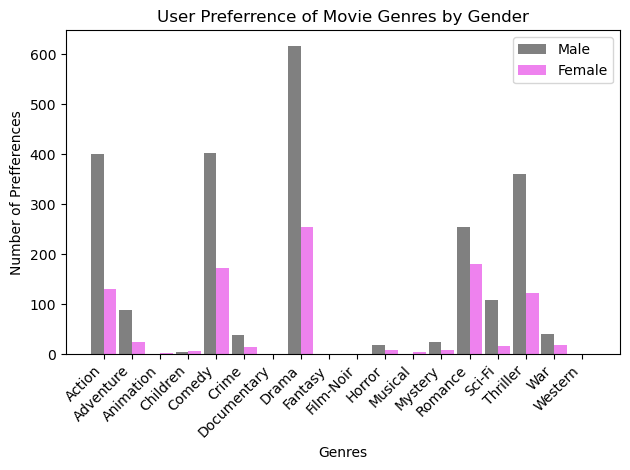

In [26]:
# Generate basic bar plot
pref_male = total_user_by_genre_male
pref_female = total_user_by_genre_female
genres = np.arange(len(pref_male[1:])) 
c_male = ['grey']
c_female = ['violet']

# Creating the bar plot
width = 0.45  # the width of the bars
fig, ax = plt.subplots()
bars1 = ax.bar(genres - width/2, pref_male[1:], width, label='Male', color=c_male)
bars2 = ax.bar(genres + width/2, pref_female[1:], width, label='Female', color=c_female)

# Adding labels and title
ax.set_xlabel('Genres')
ax.set_ylabel('Number of Prefferences')
ax.set_title('User Preferrence of Movie Genres by Gender')
ax.set_xticks(genres)
ax.set_xticklabels(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
ax.legend()

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

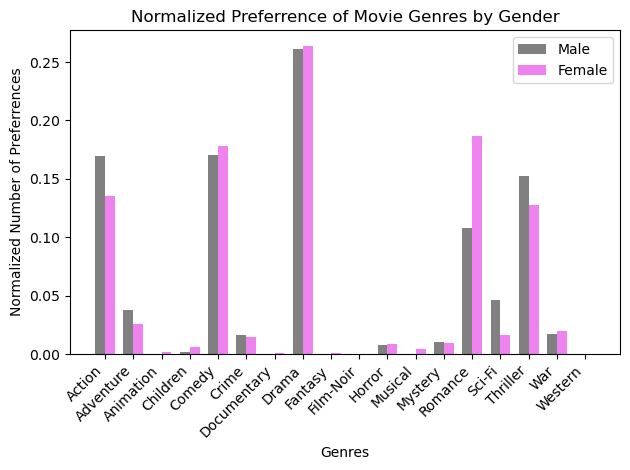

In [27]:
# Generate normalized bar plot
genres = np.arange(len(pref_male[1:]))
c_male = ['grey']
c_female = ['violet']

# Normalize occurrences
total_pref_male = np.sum(pref_male[1:])
total_pref_female = np.sum(pref_female[1:])
normalized_pref_male = pref_male[1:] / total_pref_male
normalized_pref_female = pref_female[1:] / total_pref_female

# Creating the bar plot
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
bars1 = ax.bar(genres - width/2, normalized_pref_male, width, label='Male', color=c_male)
bars2 = ax.bar(genres + width/2, normalized_pref_female, width, label='Female', color=c_female)

# Adding labels and title
ax.set_xlabel('Genres')
ax.set_ylabel('Normalized Number of Preferrences')
ax.set_title('Normalized Preferrence of Movie Genres by Gender')
ax.set_xticks(genres)
ax.set_xticklabels(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
ax.legend()

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/tmp/ipykernel_24597/57303513.py:13: RuntimeWarning: invalid value encountered in divide
  percentage_occurrences_pref = stacked_occurrences_pref / total_occurrences_pref * 100


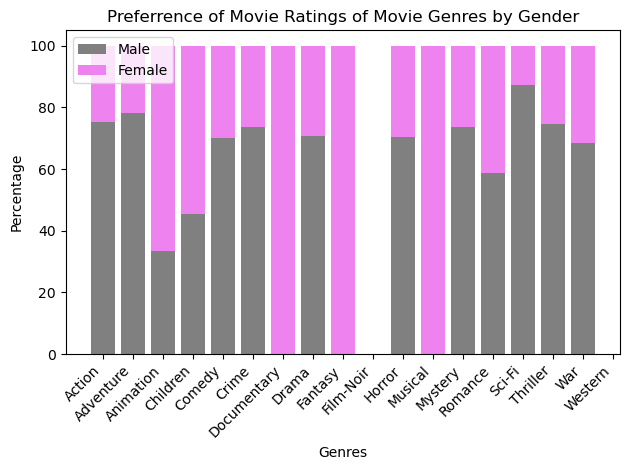

In [28]:
# Percentage wise bar plot
genres = np.arange(len(pref_male[1:]))
c_male = ['grey']
c_female = ['violet']

# Stack male and female occurrences
stacked_occurrences_pref = np.vstack((pref_male[1:], pref_female[1:]))

# Calculate total occurrences
total_occurrences_pref = np.sum(stacked_occurrences_pref, axis=0)

# Calculate percentages
percentage_occurrences_pref = stacked_occurrences_pref / total_occurrences_pref * 100

# Plotting
fig, ax = plt.subplots()
bars1 = ax.bar(genres, percentage_occurrences_pref[0], label='Male', color=c_male)
bars2 = ax.bar(genres, percentage_occurrences_pref[1], bottom=percentage_occurrences_pref[0], label='Female', color=c_female)

# Adding labels and title
ax.set_xlabel('Genres')
ax.set_ylabel('Percentage')
ax.set_title('Preferrence of Movie Ratings of Movie Genres by Gender')
ax.set_xticks(genres)
ax.set_xticklabels(['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'])
ax.legend()

# Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()